In [177]:
# Solve the triangle using line equations 
# Given x, v0, v1. Accelerate to v_c, then back down
%reset -f 
from sympy import * 
import math 
from trajectory.trapmath import *
from sympy.solvers.solveset import linsolve

x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

# Simple trapezoid equation

t_a = ((v_c - v_0) / a)
t_d = ((v_1 - v_c) / a)


x_a = ((v_0 + v_c) / 2) * t_a
x_d = ((v_c + v_1) / 2) * t_d

t_c = t - t_a - t_d
x_c = v_c * t_c

x_pent = simplify(x_a+x_c+x_d)


#==================

# Linear equations

v0_u  =  a*t+v_0
v0_d  =  -a*t+v_0



v1_u  = -a*(t-t_f)+v_1
v1_d  = a*(t-t_f)+v_1

e_v0 = Eq(v,v0_u)
e_v1 = Eq(v,v1_u)

# =================

e_x =   Eq(x,   (v_0 + v_1)/2 * t)  # No a
e_t =   Eq(x,   (a*t**2)/2)         # No v
e_v_1 = Eq(v_1, (v_0 - a*t))        # No x


In [178]:
x, t,  a, v, v_0, v_c, v_1, t_a, t_d, t_f, v_max= symbols('x t a_max v v_0 v_c v_1 t_a t_d t_f v_max', real=True)

t_x = v_c/a
e_x = Eq(x, (t+t-t_x)/2*v_c)
solve(e_x, v_c)


[a_max*t - sqrt(a_max*(a_max*t**2 - 2*x)),
 a_max*t + sqrt(a_max*(a_max*t**2 - 2*x))]

In [181]:
e_x = Eq(x, v_c * (t-t_x) )
solve(e_x,v_c)

[a_max*t/2 - sqrt(a_max*(a_max*t**2 - 4*x))/2,
 a_max*t/2 + sqrt(a_max*(a_max*t**2 - 4*x))/2]

In [179]:
v_0+a*solve(Eq(v0_u, v1_u),t)[0], v_0-a*solve(Eq(v0_d, v1_d), t)[0]

(a_max*t_f/2 + v_0/2 + v_1/2, -a_max*t_f/2 + v_0/2 + v_1/2)

In [151]:
solve(Eq(v0_d, v1_d), t)[0], solve(Eq(v0_u, v1_u), t)[0]

((a_max*t_f + v_0 - v_1)/(2*a_max), (a_max*t_f - v_0 + v_1)/(2*a_max))

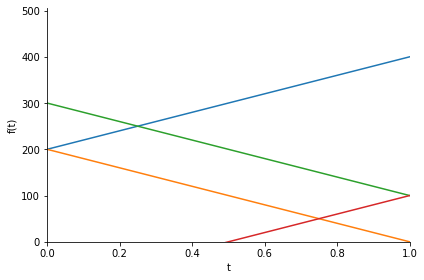

In [191]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sympy.plotting import plot

v0u = plot((a*t+v_0).subs(v_0,200).subs(a,200), show=False,xlim=(0,1), ylim=(0,505))
v0d = plot((-a*t+v_0).subs(v_0,200).subs(a,200), show=False,xlim=(0,1), ylim=(0,505))

v1u = plot((-a*(t-t_f)+v_1).subs(v_1,100).subs(a,200).subs(t_f,1), show=False, xlim=(0,1), ylim=(0,505))
v1d = plot((a*(t-t_f)+v_1).subs(v_1,100).subs(a,200).subs(t_f,1), show=False, xlim=(0,1), ylim=(0,505))

v0u.append(v0d[0])
v0u.append(v1u[0])
v0u.append(v1d[0])

v0u.show()

In [127]:
# Lower Intersection
t_i = solve(Eq(v0_d , v1_d), t)[0]
t_i

(a_max*t_f + v_0 - v_1)/(2*a_max)

In [122]:
# Upper Intersection
t_i =solve(Eq(v0_u , v1_u), t)[0]
t_i

(a_max*t_f - v_0 + v_1)/(2*a_max)